# **1. Perkenalan Dataset**


Nama Dataset: Air Quality Dataset 2013-2017

Sumber : https://github.com/marceloreis/HTI/tree/c8688fc517972e373d7c1df3a8d82b2a2468131f/PRSA_Data_20130301-20170228

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [66]:
# Libray untuk Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
aotizhongxin = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Dingling_20130301-20170228.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Fitur yang digunakan:

a. PM2.5, PM10, SO2, NO2, CO, O3 (Fitur utama kualitas udara)

b. TEMP, PRES, DEWP, RAIN, WSPM, wd (Faktor lingkungan)

c. year, month, day, hour (Polusi bisa memiliki pola musiman/harian)

d. Station (Zona dengan risiko polusi tertinggi)
*italicized text*
e. wd (Digunakan setelah melalui proses encoding)

### Aotizhongxin

In [23]:
# Melihat Struktur Dataframe
aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [24]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", aotizhongxin.isnull().sum().sum())
aotizhongxin.isnull().sum()

Jumlah missing values: 7271


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [25]:
# Mengecek Duplicated Data
aotizhongxin.duplicated().sum()

0

In [26]:
# Menampilkan Beberapa value dari Dataframe
aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Changping

In [27]:
# Melihat Struktur Dataframe
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [28]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", changping.isnull().sum().sum())
changping.isnull().sum()

Jumlah missing values: 5166


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [29]:
# Menampilkan Duplicated Data
changping.duplicated().sum()

0

In [30]:
# Menampilkan Isi dari Dataframe
changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Dingling

In [31]:
# Menampilkan Struktur Dataframe
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [32]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", dingling.isnull().sum().sum())
dingling.isnull().sum()

Jumlah missing values: 7015


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [33]:
# Menampilkan Duplicated Data
dingling.duplicated().sum()

0

In [34]:
# Menampilkan value dari Dataframe
dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


# Penggabungan Data

In [35]:
# Penggabungan Ketiga Dataframe
kota = pd.concat([aotizhongxin, changping, dingling])
print(kota["station"].value_counts())

station
Aotizhongxin    35064
Changping       35064
Dingling        35064
Name: count, dtype: int64


In [36]:
# Menggabungkan Kolom Year, Month, Day, dan Hour mejadi kolom Date
kota['datetime'] = pd.to_datetime(kota[['year', 'month', 'day', 'hour']])

# Cek hasilnya
print(kota[['datetime']].head())

             datetime
0 2013-03-01 00:00:00
1 2013-03-01 01:00:00
2 2013-03-01 02:00:00
3 2013-03-01 03:00:00
4 2013-03-01 04:00:00


In [37]:
#mengelompokkan kolom berdasarkan data type
dtype = kota.dtypes

column_by_dtype = {}
for column, dtype in dtype.items():
    if dtype == 'object':
        column_by_dtype['object'] = column_by_dtype.get('object', []) + [column]
    else:
        column_by_dtype['numeric'] = column_by_dtype.get('numeric', []) + [column]

print('Kolom kategorikal : ', column_by_dtype['object'])
print('Kolom numerikal : ', column_by_dtype['numeric'])

Kolom kategorikal :  ['wd', 'station']
Kolom numerikal :  ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'datetime']


In [38]:
# Melihat kota dengan tingkat konsentrasi PM2.5 tertinggi
kota.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

,PM2.5
station,
Aotizhongxin,82.773611
Changping,71.099743
Dingling,65.989497


In [39]:
# Melihat kota dengan tingkat konsentrasi PM10 tertinggi
kota.groupby('station')['PM10'].mean().sort_values(ascending=False)

,PM10
station,
Aotizhongxin,110.060391
Changping,94.657871
Dingling,83.739723


In [40]:
# Melihat kota dengan tingkat konsentrasi SO2 tertinggi
kota.groupby('station')['SO2'].mean().sort_values(ascending=False)

,SO2
station,
Aotizhongxin,17.375901
Changping,14.958906
Dingling,11.749650


In [41]:
# Melihat kota dengan tingkat konsentrasi NO2 tertinggi
kota.groupby('station')['NO2'].mean().sort_values(ascending=False)

,NO2
station,
Aotizhongxin,59.305833
Changping,44.182086
Dingling,27.585467


In [42]:
# Melihat kota dengan tingkat konsentrasi CO tertinggi
kota.groupby('station')['CO'].mean().sort_values(ascending=False)

,CO
station,
Aotizhongxin,1262.945145
Changping,1152.301345
Dingling,904.896073


In [43]:
# Melihat kota dengan tingkat konsentrasi O3 tertinggi
kota.groupby('station')['O3'].mean().sort_values(ascending=False)

,O3
station,
Dingling,68.548371
Changping,57.940003
Aotizhongxin,56.353358


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menangani Missing Value

In [44]:
# Kolom PM2.5
kota['PM2.5'] = kota.groupby("station")["PM2.5"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PM2.5'].isnull().sum())

Jumlah Missing Value:  0


In [45]:
# Kolom PM10
kota['PM10'] = kota.groupby("station")["PM10"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PM10'].isnull().sum())

Jumlah Missing Value:  0


In [46]:
# Kolom SO2
kota['SO2'] = kota.groupby("station")["SO2"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['SO2'].isnull().sum())

Jumlah Missing Value:  0


In [47]:
# Kolom NO2
kota['NO2'] = kota.groupby("station")["NO2"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['NO2'].isnull().sum())

Jumlah Missing Value:  0


In [48]:
# Kolom CO
kota['CO'] = kota.groupby("station")["CO"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['CO'].isnull().sum())

Jumlah Missing Value:  0


In [49]:
# Kolom O3
kota['O3'] = kota.groupby("station")["O3"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['O3'].isnull().sum())

Jumlah Missing Value:  0


In [50]:
# Kolom TEMP
kota['TEMP'] = kota.groupby("station")["TEMP"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['TEMP'].isnull().sum())
#

Jumlah Missing Value:  0


In [51]:
# Kolom PRES
kota['PRES'] = kota.groupby("station")["PRES"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PRES'].isnull().sum())

Jumlah Missing Value:  0


In [52]:
# Kolom DEWP
kota['DEWP'] = kota.groupby("station")["DEWP"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['DEWP'].isnull().sum())

Jumlah Missing Value:  0


In [53]:
# Kolom RAIN
kota['RAIN'] = kota.groupby("station")["RAIN"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['RAIN'].isnull().sum())

Jumlah Missing Value:  0


In [54]:
# Kolom WSPM
kota['WSPM'] = kota.groupby("station")["WSPM"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['WSPM'].isnull().sum())
#

Jumlah Missing Value:  0


## Deteksi Outliers & Penanganan Outliers

### Deteksi Outliers

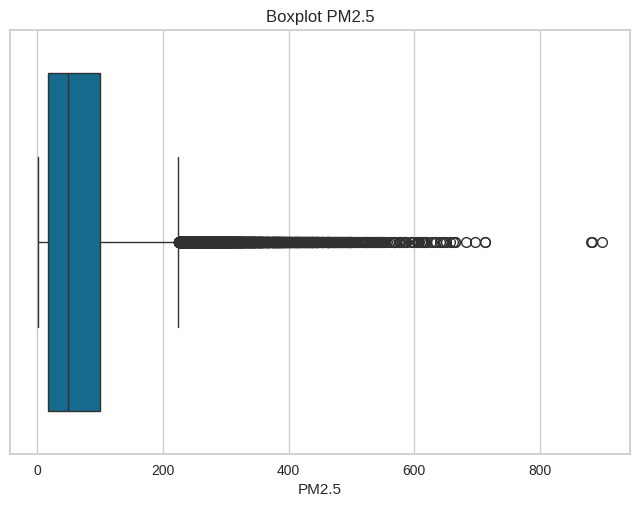

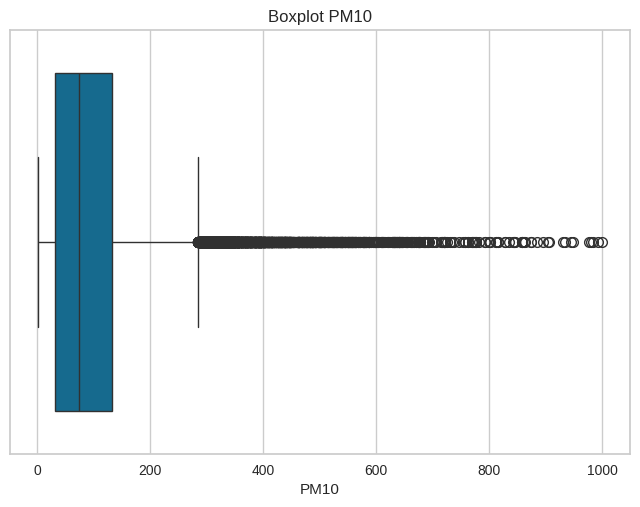

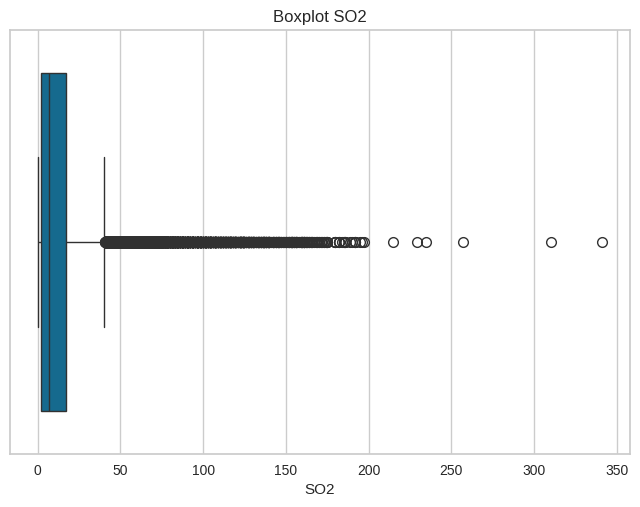

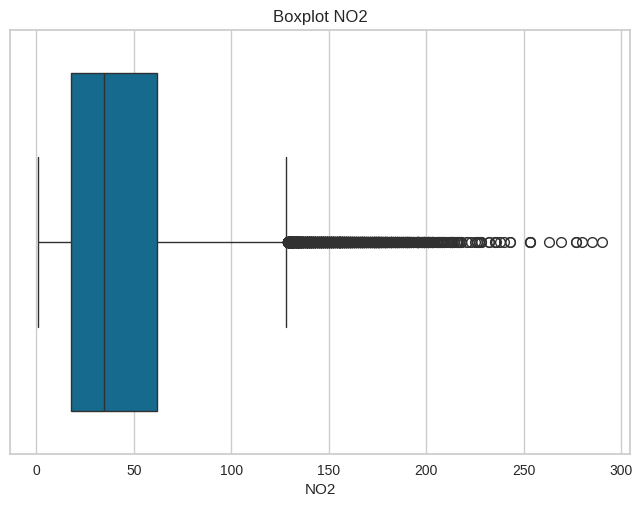

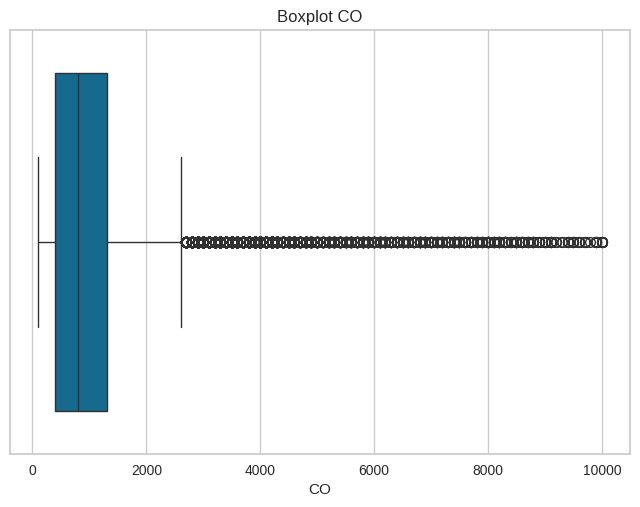

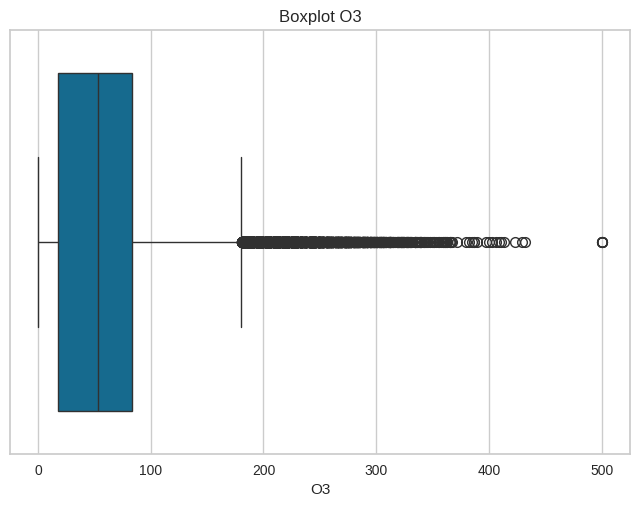

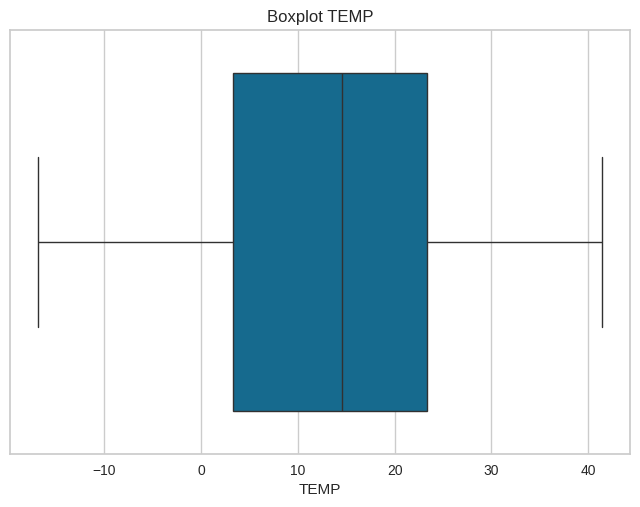

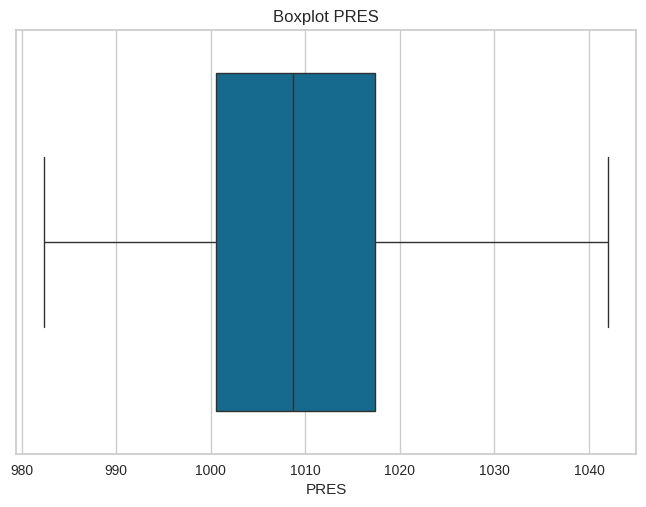

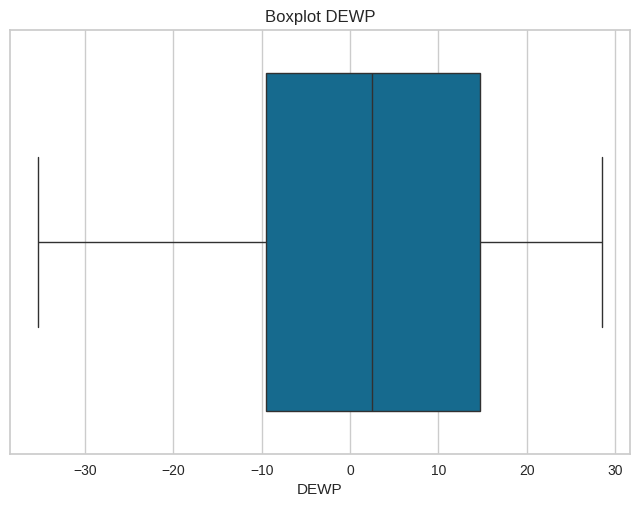

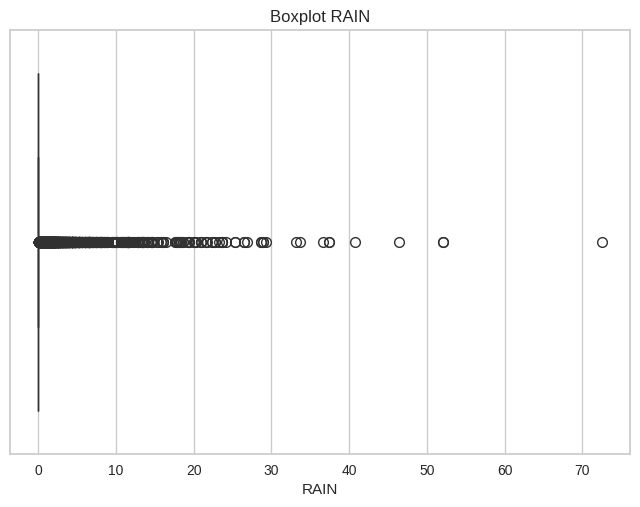

Text(0.5, 1.0, 'Boxplot WSPM')

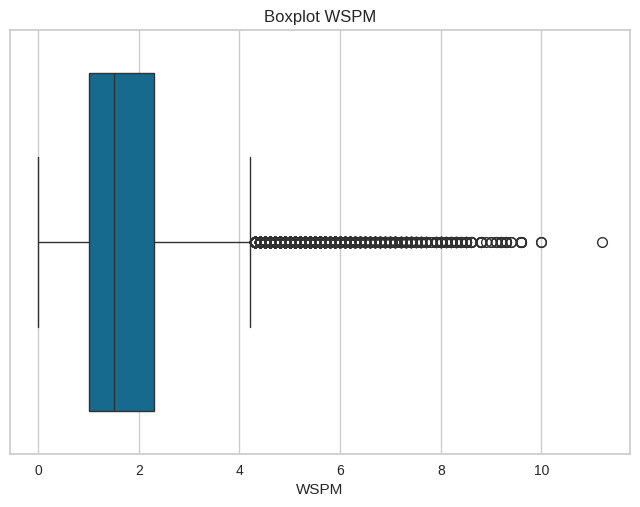

In [55]:
# PM2.5
sns.boxplot(x=kota['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=kota['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=kota['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=kota['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=kota['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=kota['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# TEMP
sns.boxplot(x=kota['TEMP']) # Deteksi
plt.title("Boxplot TEMP")
plt.show()

# PRES
sns.boxplot(x=kota['PRES']) # Deteksi
plt.title("Boxplot PRES")
plt.show()

# DEWP
sns.boxplot(x=kota['DEWP']) # Deteksi
plt.title("Boxplot DEWP")
plt.show()

# RAIN
sns.boxplot(x=kota['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=kota['WSPM']) # Deteksi
plt.title("Boxplot WSPM")

In [56]:
# Hitung outliers melalui IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(data)) * 100  # Jumlah dan persentase outlier

# Hitung presentase outliers untuk polutan
outliers_pm25, count_pm25, percent_pm25 = detect_outliers_iqr(kota, "PM2.5")
outliers_pm10, count_pm10, percent_pm10 = detect_outliers_iqr(kota, "PM10")
outliers_so2, count_so2, percent_so2 = detect_outliers_iqr(kota, "SO2")
outliers_no2, count_no2, percent_no2 = detect_outliers_iqr(kota, "NO2")
outliers_co, count_co, percent_co = detect_outliers_iqr(kota, "CO")
outliers_o3, count_o3, percent_o3 = detect_outliers_iqr(kota, "O3")

# Hitung presentase outliers untuk faktor polutan
outliers_temp, count_temp, percent_temp = detect_outliers_iqr(kota, "TEMP")
outliers_pres, count_pres, percent_pres = detect_outliers_iqr(kota, "PRES")
outliers_dewp, count_dewp, percent_dewp = detect_outliers_iqr(kota, "DEWP")
outliers_rain, count_rain, percent_rain = detect_outliers_iqr(kota, "RAIN")
outliers_wspm, count_wspm, percent_wspm = detect_outliers_iqr(kota, "WSPM")

# Tampilkan presentase outliers hasil polutan
print(f"Outlier PM2.5: {count_pm25} data ({percent_pm25:.2f}%)")
print(f"Outlier PM10: {count_pm10} data ({percent_pm10:.2f}%)")
print(f"Outlier SO2: {count_so2} data ({percent_so2:.2f}%)")
print(f"Outlier NO2: {count_no2} data ({percent_no2:.2f}%)")
print(f"Outlier CO: {count_co} data ({percent_co:.2f}%)")
print(f"Outlier O3: {count_o3} data ({percent_o3:.2f}%)")


# Tampilkan hasil faktor polutan
print(f"Outlier TEMP: {count_temp} data ({percent_temp:.2f}%)")
print(f"Outlier PRES: {count_pres} data ({percent_pres:.2f}%)")
print(f"Outlier DEWP: {count_dewp} data ({percent_dewp:.2f}%)")
print(f"Outlier RAIN: {count_rain} data ({percent_rain:.2f}%)")
print(f"Outlier WSPM: {count_wspm} data ({percent_wspm:.2f}%)")

Outlier PM2.5: 5405 data (5.14%)
Outlier PM10: 3971 data (3.78%)
Outlier SO2: 9450 data (8.98%)
Outlier NO2: 2293 data (2.18%)
Outlier CO: 7968 data (7.57%)
Outlier O3: 4730 data (4.50%)
Outlier TEMP: 0 data (0.00%)
Outlier PRES: 0 data (0.00%)
Outlier DEWP: 0 data (0.00%)
Outlier RAIN: 4202 data (3.99%)
Outlier WSPM: 6342 data (6.03%)


In [57]:
# Mengatasi Missing Value kolom wd
kota['wd'] = kota.groupby('station')['wd'].transform(lambda x: x.fillna(x.mode()[0]))
print('Jumlah Missing Value: ', kota['wd'].isnull().sum())

Jumlah Missing Value:  0


In [58]:
# One-Hot Encoding pada kolom 'wd'
encod = pd.get_dummies(kota, columns=['wd'])

# Label Encoding pada kolom 'station'
label_encoder = LabelEncoder()
encod['station'] = label_encoder.fit_transform(encod['station'])


# Mengecek kolom setelah encoding
print(encod)
print("Kolom station: ", encod['station'])

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  ...   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  ...   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  ...   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  ...   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  ...   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...  ...   
35059  35060  2017      2   28    19   11.0  11.0   2.0   2.0  200.0  ...   
35060  35061  2017      2   28    20   13.0  13.0   2.0   2.0  200.0  ...   
35061  35062  2017      2   28    21    9.0  14.0   2.0   2.0  200.0  ...   
35062  35063  2017      2   28    22   10.0  12.0   2.0   2.0  200.0  ...   
35063  35064  2017      2   28    23   13.0  16.0   4.0   9.0  500.0  ...   

       wd_NNW  wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  wd_SW   wd_W  wd_WNW  \

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [69]:
# Fitur polutan untuk clustering
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
X = encod[features]

# Scaling hanya pada fitur polusi udara dengan RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=features)

K = 2, Silhouette Score = 0.5213
K = 3, Silhouette Score = 0.3477
K = 4, Silhouette Score = 0.3372
K = 5, Silhouette Score = 0.3370
K = 6, Silhouette Score = 0.3244
K = 7, Silhouette Score = 0.2976
K = 8, Silhouette Score = 0.2703
K = 9, Silhouette Score = 0.2440
K = 10, Silhouette Score = 0.2562


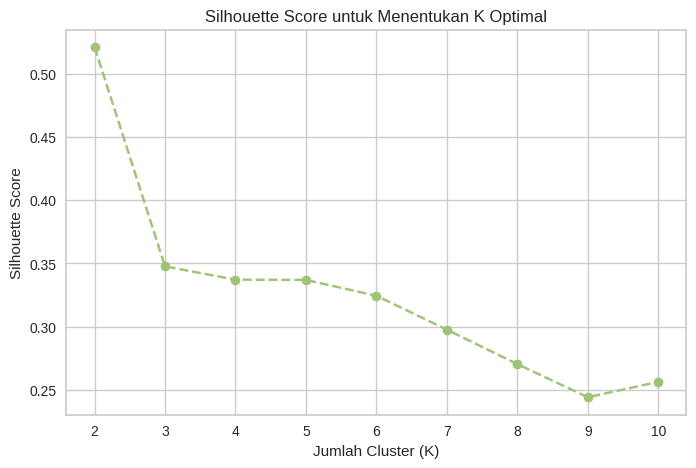

In [70]:
# Menyimpan silhouette score untuk setiap K
silhouette_scores = []

for k in range(2, 11):  # Silhouette tidak bisa dihitung untuk K=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append((k, score))
    print(f'K = {k}, Silhouette Score = {score:.4f}')

# Menampilkan grafik Silhouette Score
k_values, scores = zip(*silhouette_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='g')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()


In [80]:
# K-Means Clustering untuk K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

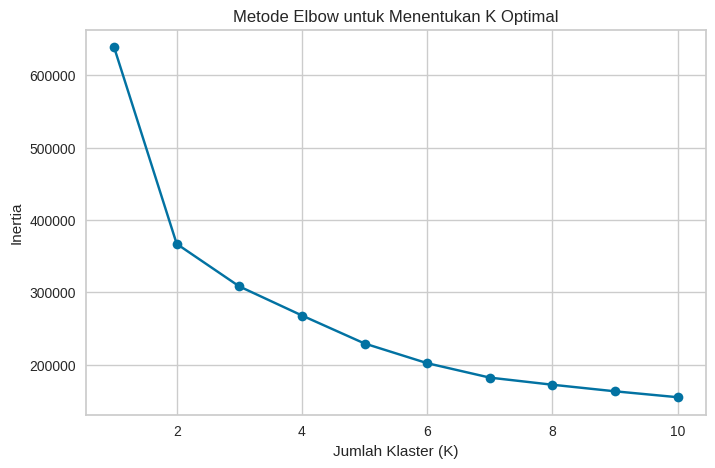

In [72]:
# Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [81]:
# Terapkan PCA untuk mengurangi dimensi menjadi 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

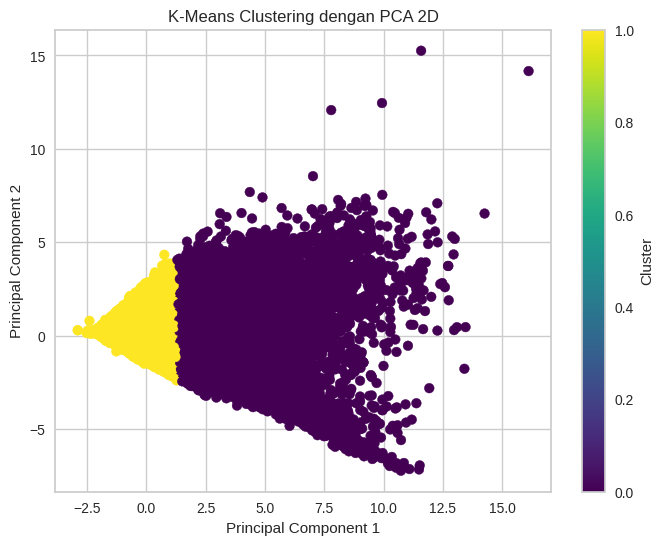

In [82]:
# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering dengan PCA 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [85]:
# Statistik rata-rata tiap cluster
cluster_stats = df_scaled.groupby('Cluster')[features].mean()
print("Statistik rata-rata tiap cluster:")
print(cluster_stats)

# Menentukan zona dengan tingkat polusi tertinggi (berdasarkan rata-rata polutan)
highest_pollution_zone = cluster_stats.idxmax(axis=1)
print("Zona dengan tingkat polusi tertinggi per polutan:")
print(highest_pollution_zone)

Statistik rata-rata tiap cluster:
            PM2.5      PM10       SO2       NO2        CO        O3
Cluster                                                            
0        1.591967  1.367394  2.287201  1.232798  2.129874 -0.394846
1       -0.015520 -0.039882  0.097024 -0.036224 -0.063155  0.239021
Zona dengan tingkat polusi tertinggi per polutan:
Cluster
0    SO2
1     O3
dtype: object


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata PM2.5:** 1.59
- **Rata-rata PM10:** 1.37
- **Rata-rata SO2:** 2.29
- **Rata-rata NO2:** 1.23
- **Rata-rata CO:** 2.13
- **Rata-rata O3:** -0.39
- **Analisis:** Cluster ini memiliki tingkat polusi yang relatif tinggi, terutama disebabkan oleh SO2, CO, dan PM2.5. Zona dalam cluster ini kemungkinan besar mencakup wilayah industri atau area dengan emisi bahan bakar fosil yang tinggi.

## Cluster 2:
- **Rata-rata PM2.5:** -0.015
- **Rata-rata PM10:** -0.039
- **Rata-rata SO2:** 0.097
- **Rata-rata NO2:** -0.036
- **Rata-rata CO:** -0.063
- **Rata-rata O3:** 0.24
- **Analisis:** Cluster ini memiliki tingkat polusi yang lebih rendah dibandingkan cluster 0, dengan dominasi O3. Kemungkinan cluster ini mencakup area yang lebih bersih atau zona suburban dengan lebih banyak ruang terbuka hijau, di mana ozon terbentuk akibat reaksi fotokimia di atmosfer.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [86]:
# Ekspor data yang telah memiliki label
df_scaled.to_csv('Air_Quality_labeled.csv', index=False)

In [87]:
pip freeze > requirements.txt